In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import scipy.stats as stats

In [2]:
df_TFD = pd.read_csv('../../datasets/TitanicFromDIsaster_train.csv')
df_TFD.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_TFD.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## quest
- 범주형/범주형, 연속형/연속형 확증 데이터 검증

### 범주형/범주형

#### 선정 변수 : Sex, Embarked
- 분석 내용 : 성별에 따른 탑승위치의 상관관계가 있을까?
    - 귀무가설 : 성별에 따른 탑승위치의 상관관계가 없다.
    - 대립가설 : 성별에 따른 탑승위치의 상관관계가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참 (statistic=13.355630, pvalue=0.001258)
    - 사실 결론 : 성별에 따른 탑승위치의 상관관계가 있다.

In [10]:
df_TFD[['Sex', 'Embarked']].isnull().sum()

Sex         0
Embarked    2
dtype: int64

In [15]:
df_TFD_Sex = df_TFD[['Sex', 'Embarked']].dropna().copy()
df_TFD_Sex[:3]

,Sex,Embarked
0,male,S
1,female,C
2,female,S


In [14]:
df_TFD_Sex.isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [17]:
df_TFD_Sex_pivot = pd.pivot_table(data=df_TFD_Sex, index='Sex'
                                       , columns='Embarked', aggfunc=len).copy()
df_TFD_Sex_pivot

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [20]:
stats.chi2_contingency(observed=df_TFD_Sex_pivot, correction=True)

Chi2ContingencyResult(statistic=13.355630515001746, pvalue=0.0012585245232290144, dof=2, expected_freq=array([[ 58.96062992,  27.02362205, 226.01574803],
       [109.03937008,  49.97637795, 417.98425197]]))

### 연속형/연속형

#### 선정 변수 : SibSp, Age
- 분석 내용 : 나이에 따른 형제와와이프의 상관관계가 있는가?
    - 귀무가설 : 나이에 따른 형제와와이프의 상관관계가 없다.
    - 대립가설 : 나이에 따른 형제와와이프의 상관관계가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참(statistic=-0.30824, pvalue=3.5090251937842815e-17)
    - 사실 결론 : 나이에 따른 형제와와이프의 상관관계가 있다.

In [33]:
df_TFD.describe()[:3]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429


In [34]:
df_TFD_Age = df_TFD[['SibSp', 'Age']]
df_TFD_Age[:3]

,SibSp,Age
0,1,22.0
1,1,38.0
2,0,26.0


In [35]:
df_TFD_Age.isnull().sum()

SibSp      0
Age      177
dtype: int64

In [36]:
df_Age_dropna = df_TFD_Age.dropna().copy()
df_Age_dropna[:3]

,SibSp,Age
0,1,22.0
1,1,38.0
2,0,26.0


In [37]:
df_Age_dropna.isnull().sum()

SibSp    0
Age      0
dtype: int64

In [38]:
stats.pearsonr(df_Age_dropna['SibSp'],df_Age_dropna['Age'])

PearsonRResult(statistic=-0.3082467589236567, pvalue=3.5090251937842815e-17)

## quest
- 목표변수 'Survived', 설명변수 : 'Pclass', 'Sex', 'Age'
- 목표변수에 대한 설명변수들에 대한 인사이트 찾기

#### 선정 변수 : Survived, Pclass
- 분석 내용 : 객실등급에 따른 생존률에 차이가 있는가?
    - 귀무가설 : 차이가 없다.
    - 대립가설 : 차이가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 귀무가설 참, pvalue=8.32781
    - 사실 결론 : 차이가 없다.

In [9]:
df_TFD[['Pclass', 'Survived']].isnull().sum()

Pclass      0
Survived    0
dtype: int64

In [13]:
df_TFD_Pclass = df_TFD[['Pclass', 'Survived']]
df_TFD_Pclass = df_TFD_Pclass[:500]
df_TFD_Pclass

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
495,3,0
496,1,1
497,3,0
498,1,0


In [16]:
df_TFD_Pclass_pivot = pd.pivot_table(data=df_TFD_Pclass, index='Pclass', columns='Survived', aggfunc=len)
df_TFD_Pclass_pivot

Survived,0,1
Pclass,,
1,50,66
2,56,49
3,201,78


In [25]:
stats.chi2_contingency(df_TFD_Pclass_pivot, correction=True)

Chi2ContingencyResult(statistic=32.602160374934286, pvalue=8.327810333396859e-08, dof=2, expected_freq=array([[ 71.224,  44.776],
       [ 64.47 ,  40.53 ],
       [171.306, 107.694]]))

#### 선정 변수 : Survived, Sex
- 분석 내용 : 성별에 따라 생존률에 차이가 있는가?
    - 귀무가설 : 차이가 없다.
    - 대립가설 : 차이가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 귀무가설 참, pvalue=2.568600
    - 사실 결론 : 차이가 없다.

In [28]:
df_TFD[['Sex', 'Survived']].isnull().sum()

Sex         0
Survived    0
dtype: int64

In [29]:
df_TFD_Pclass = df_TFD[['Sex', 'Survived']]
df_TFD_Pclass = df_TFD_Pclass[:500]
df_TFD_Pclass

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
495,male,0
496,female,1
497,male,0
498,female,0


In [33]:
df_TFD_Sex_pivot1 = pd.pivot_table(data=df_TFD_Pclass, index='Sex', columns='Survived', aggfunc=len)
df_TFD_Sex_pivot1

Survived,0,1
Sex,,
female,46,139
male,261,54


In [34]:
stats.chi2_contingency(df_TFD_Sex_pivot1, correction=True)

Chi2ContingencyResult(statistic=162.9474731110147, pvalue=2.5686001450555184e-37, dof=1, expected_freq=array([[113.59,  71.41],
       [193.41, 121.59]]))

#### 선정 변수 : Survived, Age
- 분석 내용 : 나이에 따라 생존률에 차이가 있는가?
    - 귀무가설 : 차이가 없다.
    - 대립가설 : 차이가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 귀무가설 참. pvalue=1.040939
    - 사실 결론 : 차이가 없다.

In [40]:
df_TFD_Age = df_TFD[['Age', 'Survived']]
df_TFD_Age = df_TFD_Pclass[:500]
df_TFD_Age

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
495,NaN,0
496,54.0,1
497,NaN,0
498,25.0,0


In [44]:
df_TFD_Age.isnull().sum()

Age         0
Survived    0
dtype: int64

In [43]:
df_TFD_Age = df_TFD_Age.dropna().copy()
df_TFD_Age

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
493,71.0,0
494,21.0,0
496,54.0,1
498,25.0,0


In [45]:
df_TFD_Age['Survived'].value_counts()

0    240
1    158
Name: Survived, dtype: int64

In [46]:
stats.shapiro(df_TFD_Age['Survived'])

ShapiroResult(statistic=0.6208980083465576, pvalue=1.142925671756484e-28)

<Axes: xlabel='Age', ylabel='Count'>

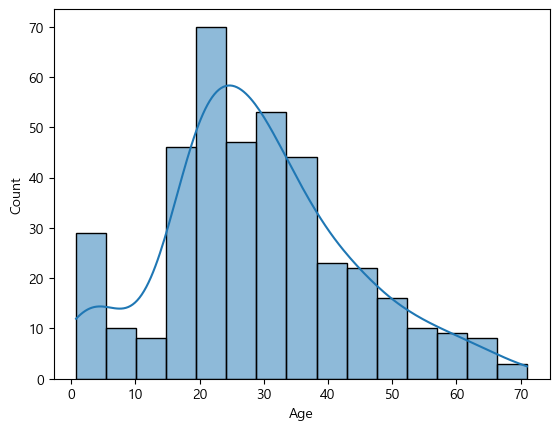

In [48]:
sns.histplot(data=df_TFD_Age, x='Age', kde=True)

<Axes: xlabel='Survived', ylabel='count'>

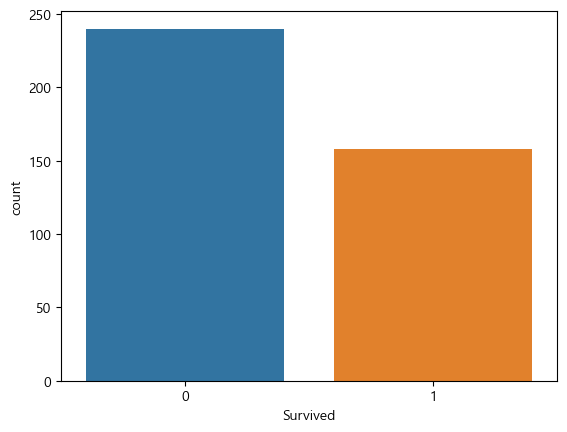

In [51]:
# 등분산 검증 
sns.countplot(data=df_TFD_Age, x='Survived')

In [52]:
stats.levene(df_TFD_Age['Survived'],df_TFD_Age['Age'])

LeveneResult(statistic=525.1860518718069, pvalue=1.3131242826708657e-89)

<Axes: xlabel='Age', ylabel='Count'>

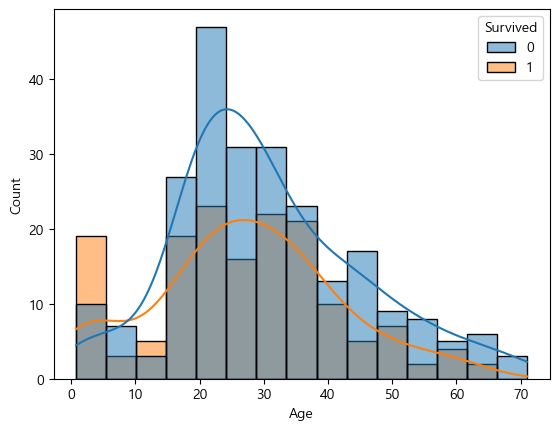

In [53]:
sns.histplot(data=df_TFD_Age, x='Age', kde=True, hue='Survived')

In [54]:
stats.ttest_ind(df_TFD_Age['Age'], df_TFD_Age['Survived'], equal_var=True)

Ttest_indResult(statistic=39.349261416582635, pvalue=1.0409397064895116e-188)

#### 분석 스토리 
